## Imports 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [3]:
data = pd.read_csv("../data/train.csv")

In [5]:
data['crew'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 13])

In [6]:
len(data[data['crew']==13])

552724

In [7]:
data.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,...,37.368999,17.437599,19.201900,20.5968,-3.95115,14.507600,-4520.0,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,...,31.170799,19.399700,19.689501,21.3547,1.33212,17.750200,-4520.0,817.705994,388.829987,A
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,...,-12.012600,19.396299,23.171700,22.4076,1.53786,22.247000,-4520.0,817.705994,388.829987,A
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,...,18.574100,23.156401,22.641199,19.3367,2.54492,18.998600,-4520.0,817.705994,388.829987,A
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,...,6.555440,22.754700,22.670300,20.2932,1.69962,22.812799,-4520.0,817.705994,388.829987,A


## Divide Variables

Identifiers - Crew, Experiment, Time, Seat, Event <br>
Signals - EEGs, ECG, R, GSR

*Events* <br>
A = baseline, B = SS, C = CA, D = DA

*Experiments* <br>  
Channelized Attention (CA) is, roughly speaking, the state of being focused on one task to the exclusion of all others. This is induced in benchmarking by having the subjects play an engaging puzzle-based video game. <br>  
Diverted Attention (DA) is the state of having one’s attention diverted by actions or thought processes associated with a decision. This is induced by having the subjects perform a display monitoring task. Periodically, a math problem showed up which had to be solved before returning to the monitoring task.<br>  
Startle/Surprise (SS) is induced by having the subjects watch movie clips with jump scares.

*Signals Other Than EEG* <br>
ecg - 3-point Electrocardiogram signal. The sensor had a resolution/bit of .012215 µV and a range of -100mV to +100mV. The data are provided in microvolts. <br>
r - Respiration, a measure of the rise and fall of the chest. The sensor had a resolution/bit of .2384186 µV and a range of -2.0V to +2.0V. The data are provided in microvolts. <br>
gsr - Galvanic Skin Response, a measure of electrodermal activity. The sensor had a resolution/bit of .2384186 µV and a range of -2.0V to +2.0V. The data are provided in microvolts.<br>

## Look at Variability of Baseline For Crew 1 Pilot 1

In [33]:
crew1pilot1CA = data[(data['crew']==1) & (data['experiment']=='CA') & (data['seat']==1)]

In [34]:
crew1pilot1CABaseline = crew1pilot1CA[crew1pilot1CA['event']=='A']

In [14]:
crew1pilot1SS = data[(data['crew']==1) & (data['experiment']=='SS') & (data['seat']==1)]

In [15]:
crew1pilot1SSBaseline = crew1pilot1SS[crew1pilot1SS['event']=='A']

In [16]:
crew1pilot1DA = data[(data['crew']==1) & (data['experiment']=='DA') & (data['seat']==1)]

In [17]:
crew1pilot1DABaseline = crew1pilot1DA[crew1pilot1DA['event']=='A']

In [19]:
crew1pilot1CABaseline.columns

Index(['crew', 'experiment', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8',
       'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3',
       'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz',
       'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr', 'event'],
      dtype='object')

In [21]:
print(len(crew1pilot1CABaseline), len(crew1pilot1DABaseline), len(crew1pilot1SSBaseline))

1733 80985 35731


In [88]:
signal = 'ecg'

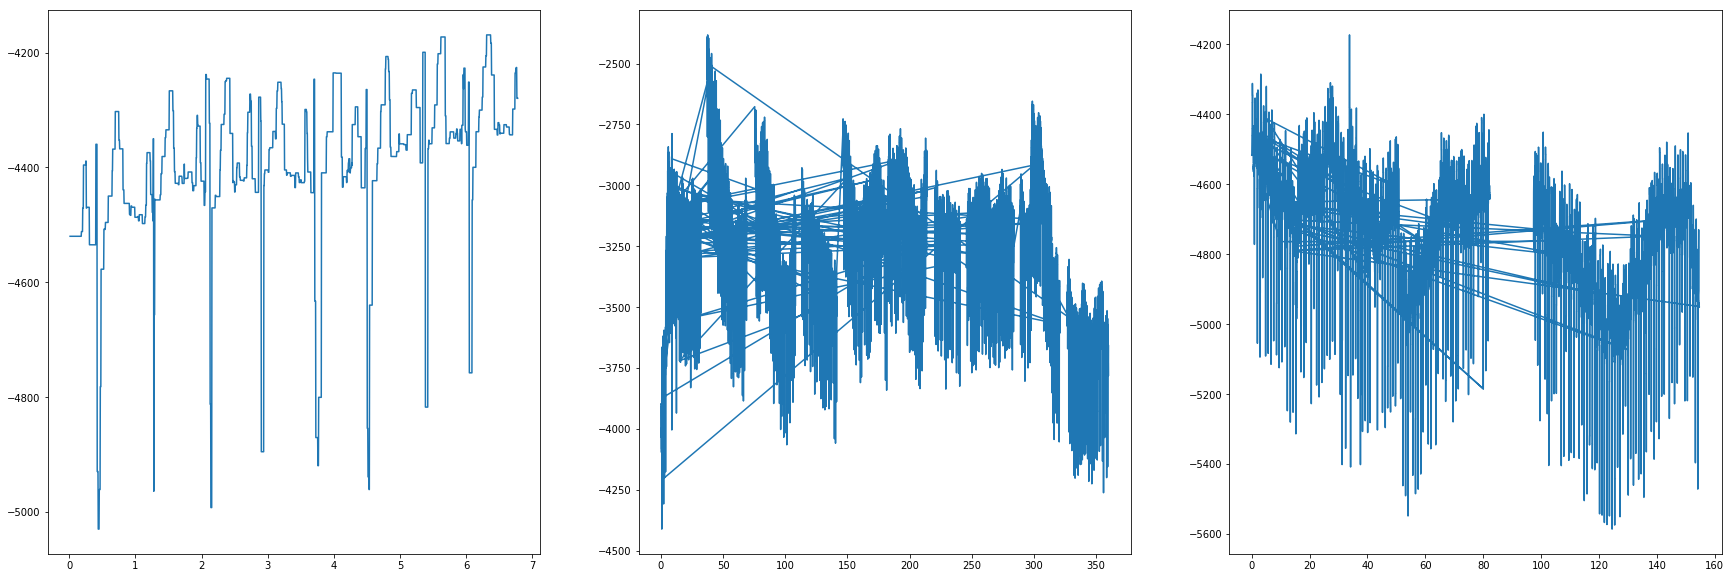

In [89]:
plt.clf()
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_size_inches(30, 10)
ax1.plot(crew1pilot1CABaseline['time'], crew1pilot1CABaseline[signal])
ax2.plot(crew1pilot1DABaseline['time'], crew1pilot1DABaseline[signal])
ax3.plot(crew1pilot1SSBaseline['time'], crew1pilot1SSBaseline[signal])
plt.show()

In [32]:
crew1pilot1CABaseline

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.285450,26.775801,-9.527310,-12.793200,16.717800,33.737499,...,37.368999,17.437599,19.201900,20.596800,-3.951150,14.507600,-4520.000000,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.428420,28.430901,-9.323510,-3.757230,15.969300,30.443600,...,31.170799,19.399700,19.689501,21.354700,1.332120,17.750200,-4520.000000,817.705994,388.829987,A
2,1,CA,0.019531,1,10.671500,30.420200,15.350700,24.724001,16.143101,32.142799,...,-12.012600,19.396299,23.171700,22.407600,1.537860,22.247000,-4520.000000,817.705994,388.829987,A
3,1,CA,0.023438,1,11.452500,25.609800,2.433080,12.412500,20.533300,31.494101,...,18.574100,23.156401,22.641199,19.336700,2.544920,18.998600,-4520.000000,817.705994,388.829987,A
4,1,CA,0.027344,1,7.283210,25.942600,0.113564,5.748000,19.833599,28.753599,...,6.555440,22.754700,22.670300,20.293200,1.699620,22.812799,-4520.000000,817.705994,388.829987,A
5,1,CA,0.031250,1,6.067460,23.128300,8.645660,14.380800,16.055500,26.925200,...,-9.289120,21.440599,23.253700,19.069599,-0.765018,26.451900,-4520.000000,817.705994,388.829987,A
6,1,CA,0.035156,1,-1.376020,20.972000,3.754160,13.766700,18.122000,29.391199,...,-0.604736,20.993401,21.556200,17.327299,1.465000,21.289301,-4520.000000,817.705994,388.829987,A
7,1,CA,0.039062,1,1.547870,18.398100,-9.113150,-1.033160,22.627001,32.816601,...,17.483601,22.912600,23.187000,18.462700,0.299232,23.691500,-4520.000000,817.705994,388.829987,A
8,1,CA,0.042969,1,-7.789460,12.210700,-8.953760,1.091740,28.526501,35.267200,...,16.681101,28.779600,28.382099,20.697300,-6.620750,31.672701,-4520.000000,817.705994,388.829987,A
9,1,CA,0.046875,1,-11.177500,18.235901,-1.035220,4.751110,25.983801,30.499100,...,0.489098,21.937500,21.629299,19.525999,-5.186040,21.618700,-4520.000000,817.705994,388.829987,A


## Plot the whole crew1 SS experiment

In [81]:
signal = 'ecg'

In [82]:
currd = data[(data['crew']==1) & (data['experiment']=='SS') & (data['seat']==1)]

In [83]:
currd = currd.sort_values('time')

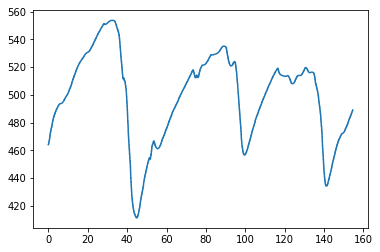

In [84]:
plt.clf()
plt.plot(currd['time'], currd[signal])
plt.show()

In [79]:
times = []
for i in range(1, len(currd)):
    if currd.iloc[i-1]['event']!=currd.iloc[i]['event']:
        times.append(currd.iloc[i]['time'])

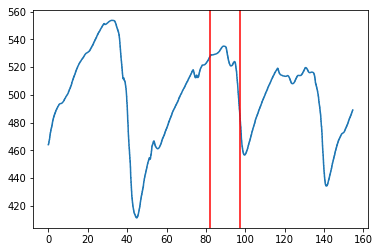

In [85]:
plt.clf()
plt.plot(currd['time'], currd[signal])
for t in times:
    plt.axvline(x=t, color='r')
plt.show()

# Plot Events 

In [117]:
crews = data['crew'].unique()
seats = data['seat'].unique()
experiments = data['experiment'].unique()

In [118]:
dataMod = data[['time', 'crew', 'seat', 'experiment', 'event']]

In [122]:
exp = 'SS'
for c in crews:
    for s in seats:
        currdata = dataMod[(dataMod['crew']==c) & (dataMod['seat']==s) &(dataMod['experiment']==exp)][['time', 'event']]
        currdata= currdata.sort_values('time')
        plt.plot(currdata['time'], currdata['event']!='A')

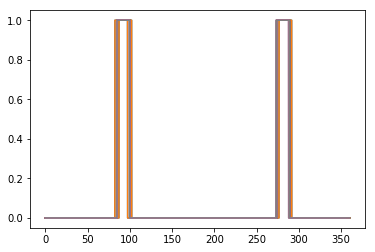

In [123]:
plt.show()

In [132]:
exp='SS'
for c in crews:
    for s in seats:
        currdata = dataMod[(dataMod['crew']==c) & (dataMod['seat']==s) &(dataMod['experiment']==exp)][['time', 'event']]
        currdata['newstate'] = currdata.event.eq(currdata.event.shift())
        times = currdata[currdata['newstate']==False]['time'][1:]
        print("Crew "+str(c)+" seat "+str(s)+": Times "+str(list(times)))

Crew 1 seat 1: Times [82.296875, 9.0, 90.0, 97.34375]
Crew 1 seat 0: Times [82.33984375, 9.0, 90.0, 97.328125]
Crew 2 seat 1: Times [100.0, 100.37890625, 274.26953125, 28.0, 280.0, 289.2890625, 85.359375, 9.0, 90.0]
Crew 2 seat 0: Times [100.003006, 100.43800400000001, 274.26001000000002, 28.002001, 280.00100700000002, 289.28402699999998, 85.409003999999996, 9.0030000000000001, 90.001007000000001]
Crew 3 seat 1: Times [100.0, 100.24609375, 274.4453125, 28.0, 280.0, 289.40625, 85.24609375, 9.0, 90.0]
Crew 3 seat 0: Times [100.0, 100.2109375, 274.421875, 28.0, 280.0, 289.41015625, 85.25, 9.0, 90.0]
Crew 4 seat 1: Times [272.88601699999998, 28.001000999999999, 280.0, 287.90600599999999, 84.834007, 9.0, 90.001007000000001, 99.848006999999996]
Crew 4 seat 0: Times [272.88900799999999, 28.002001, 280.00302099999999, 287.90499899999998, 84.834007, 9.0, 90.001007000000001, 99.846007999999998]
Crew 5 seat 1: Times [100.001007, 100.397003, 274.56500199999999, 28.002001, 280.0, 289.56402600000001

In [130]:
ca[ca['newstate']==False]['time'][1:]

438077    82.296875
446293    97.343750
Name: time, dtype: float64

In [107]:
ca = data[(data['crew']==1) & (data['experiment']=='SS') & (data['seat']==1)]

In [108]:
ca['eventNum'] = ca['event']=='A'

/Users/ninaholmgren/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [109]:
ca = ca.sort_values("time")

In [110]:
plt.plot(ca['time'], ca['eventNum'])

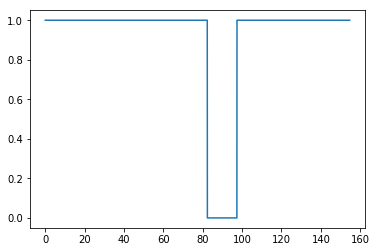

In [111]:
plt.show()